In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## 1. 데이터 구성하기

In [11]:
df_raw=pd.read_csv("/home/piai/jupyter_lee/data/IRIS.csv",engine="python",encoding='cp949')
df_raw.head(100)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [12]:
#결측치 확인
df_raw.isnull().sum(axis=0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   SPECIES       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df_raw["SPECIES"].fillna("Other",inplace=True)
df_raw.fillna(df_raw.mean(),inplace=True)

In [6]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES_setosa,SPECIES_versicolor,SPECIES_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
df_raw=df_raw_dummy
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES_setosa,SPECIES_versicolor,SPECIES_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [14]:
df_raw_y=df_raw["SPECIES"]
df_raw_x=df_raw.drop("SPECIES",axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
9,4.9,3.1,1.5,0.1
114,5.8,2.8,5.1,2.4
145,6.7,3.0,5.2,2.3
135,7.7,3.0,6.1,2.3
140,6.7,3.1,5.6,2.4
...,...,...,...,...
143,6.8,3.2,5.9,2.3
116,6.5,3.0,5.5,1.8
53,5.5,2.3,4.0,1.3
38,4.4,3.0,1.3,0.2


## 2. 기본 옵션 모델 생성

In [17]:
tree_uncustomized = DecisionTreeClassifier(criterion="entropy", random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("정확도 Training Set : {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("정확도 Test Set : {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

정확도 Training Set : 1.000
정확도 Test Set : 0.978


## 3. param - max_depth 설정

In [ ]:
train_accuracy=[];test_accuracy=[];
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["Train Accuracy"]=train_accuracy
df_accuracy_depth["Test Accuracy"]=test_accuracy

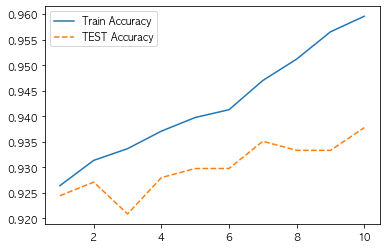

In [22]:
df_accuracy_depth.round(3)

plt.plot(para_depth,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## 4. param - min_split 설정

In [29]:
train_accuracy=[];test_accuracy=[];
para_split= [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,max_depth=10,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
df_accuracy_split= pd.DataFrame()
df_accuracy_split["split"]=para_split
df_accuracy_split["Train Accuracy"]=train_accuracy
df_accuracy_split["Test Accuracy"]=test_accuracy

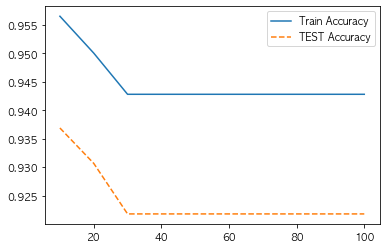

In [30]:
df_accuracy_split.round(3)

plt.plot(para_split,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## 5. param - min_leaf 설정

In [31]:
train_accuracy=[];test_accuracy=[];
para_leaf= [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split=30
                                  ,max_depth=10,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["leaf"]=para_leaf
df_accuracy_leaf["Train Accuracy"]=train_accuracy
df_accuracy_leaf["Test Accuracy"]=test_accuracy

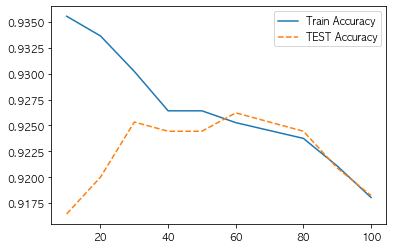

In [32]:
df_accuracy_leaf.round(3)

plt.plot(para_leaf,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## 6. 최종 모델 선정

In [19]:
tree_final=DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10,max_depth=4,random_state=1234)

tree_final.fit(df_train_x,df_train_y)

y_pred=tree_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0

Traning set 정확도 : 0.962
TEST set 정확도 : 0.956
Confusion matrix:
[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


## 7. 최종 모델 평가

## 8. 설명 변수 중요도

Text(0, 0.5, '설명변수')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


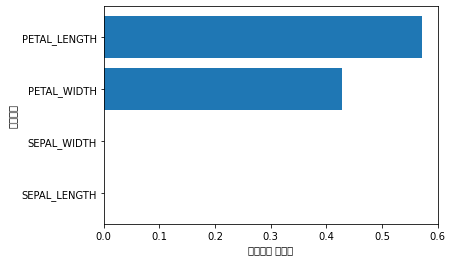

In [20]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 9. GridSearchCV